# PCA - Analisis de Componentes Principales
---
Método de reducción de dimensionalidad que permite simplificar la complejidad de espacios con múltiples dimensiones a la vez que conserva su información.

In [46]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lista de nombres de columnas para archivo ft01

column_names_ft01 = [
    'Tipo de documento',
    'N.º documento cedula/nit',
    'Digito de verificación',
    'Primer nombre/razón social',
    'Segundo nombre',
    'Primer apellido',
    'Segundo apellido',
    'niu',
    'Número de identificación consultas (nic)',
    'Medidor',
    'Dirección envió factura',
    'Ciudad envió factura',
    'Dirección suministro del servicio',
    'Barrio suministro',
    'Corregimiento suministro',
    'Municipio de suministro',
    'Mercado regulado- no regulado',
    'Sector urbano - rural',
    'Destino económico predio',
    'Estrato socioeconómico',
    'Número de factura',
    'Fecha inicio periodo facturado',
    'Fecha final periodo facturado',
    'Año/vigencia',
    'Periodo/mes',
    'Ciclo facturación',
    'Vencimiento factura',
    'Consumo kwh',
    'consumo subsidio kwh',
    'consunmo energia sin subsidios',
    'consumo energia con subsidios',
    'valor tarifa energia aplicada',
    'tarifa sub kwh',
    'ficha catastral',
    'correo electronico',
    'operador',
    'firma'
]

In [3]:
pca_ft_01_df = pd.read_csv(('./datasets/FT01_normalized.txt'), sep='|', names=column_names_ft01)

In [5]:
pca_ft_01_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174333 entries, 0 to 174332
Data columns (total 37 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Tipo de documento                         174333 non-null  object 
 1   N.º documento cedula/nit                  174333 non-null  int64  
 2   Digito de verificación                    30710 non-null   float64
 3   Primer nombre/razón social                174333 non-null  object 
 4   Segundo nombre                            0 non-null       float64
 5   Primer apellido                           0 non-null       float64
 6   Segundo apellido                          0 non-null       float64
 7   niu                                       174333 non-null  int64  
 8   Número de identificación consultas (nic)  174333 non-null  int64  
 9   Medidor                                   174333 non-null  object 
 10  Dirección envió fact

In [6]:
pca_ft_01_df.head(4)

,Tipo de documento,N.º documento cedula/nit,Digito de verificación,Primer nombre/razón social,Segundo nombre,Primer apellido,Segundo apellido,niu,Número de identificación consultas (nic),Medidor,...,Consumo kwh,consumo subsidio kwh,consunmo energia sin subsidios,consumo energia con subsidios,valor tarifa energia aplicada,tarifa sub kwh,ficha catastral,correo electronico,operador,firma
0,CC,1000000000,NaN,LISSET PA PACHON PEÑALOZA,NaN,NaN,NaN,332443,252209,C2AA169593,...,1.0,0.0,536.73,536.73,536.73,536.73,760010100031100350027901020091,NaN,NaN,NaN
1,CC,10000524,NaN,ALEXANDER CASTRILLON,NaN,NaN,NaN,11793177,46399136,B3PD10006071,...,65.0,0.0,34887.18,34887.18,536.73,536.73,760010100178400480001900010561,NaN,NaN,NaN
2,CC,1000064494,NaN,MIGUEL ANGEL BALTAZAR OSSA RIOS,NaN,NaN,NaN,1546387,976823,EWLP3539971,...,56.0,0.0,30056.65,30056.65,536.73,536.73,760010100229800010052800010052,NaN,NaN,NaN
3,CC,1000068878,NaN,L P VILLEGAS MEJIA S EN C,NaN,NaN,NaN,181514,128205,EWLE4447533,...,24.0,0.0,13601.27,13601.27,566.72,566.72,760010100020800180004000000004,NaN,NaN,NaN


# Exploracion Inicial
---
Identificamos el valor promedio y dispersión de las variables

In [9]:
# Seleccionamos sólo las variables númericas para tener una matriz numérica

m_numeric = pca_ft_01_df.select_dtypes(include=[float, int])
m_numeric.head()

,N.º documento cedula/nit,Digito de verificación,Segundo nombre,Primer apellido,Segundo apellido,niu,Número de identificación consultas (nic),Ciudad envió factura,Corregimiento suministro,Municipio de suministro,...,Periodo/mes,Ciclo facturación,Consumo kwh,consumo subsidio kwh,consunmo energia sin subsidios,consumo energia con subsidios,valor tarifa energia aplicada,tarifa sub kwh,operador,firma
0,1000000000,NaN,NaN,NaN,NaN,332443,252209,76001,NaN,76001,...,10,10,1.0,0.0,536.73,536.73,536.73,536.73,NaN,NaN
1,10000524,NaN,NaN,NaN,NaN,11793177,46399136,76001,NaN,76001,...,10,34,65.0,0.0,34887.18,34887.18,536.73,536.73,NaN,NaN
2,1000064494,NaN,NaN,NaN,NaN,1546387,976823,76001,NaN,76001,...,10,35,56.0,0.0,30056.65,30056.65,536.73,536.73,NaN,NaN
3,1000068878,NaN,NaN,NaN,NaN,181514,128205,76001,NaN,76001,...,10,6,24.0,0.0,13601.27,13601.27,566.72,566.72,NaN,NaN
4,10001070,NaN,NaN,NaN,NaN,1475003,943939,76001,NaN,76001,...,10,32,99.0,0.0,53135.86,53135.86,536.73,536.73,NaN,NaN


In [10]:
# Eliminamos todas las columnas que sean NaN
df_cleaned = m_numeric.dropna(axis=1, how='all')
df_cleaned.head()

,N.º documento cedula/nit,Digito de verificación,niu,Número de identificación consultas (nic),Ciudad envió factura,Municipio de suministro,Estrato socioeconómico,Número de factura,Año/vigencia,Periodo/mes,Ciclo facturación,Consumo kwh,consumo subsidio kwh,consunmo energia sin subsidios,consumo energia con subsidios,valor tarifa energia aplicada,tarifa sub kwh
0,1000000000,NaN,332443,252209,76001,76001,99,297852432,2020,10,10,1.0,0.0,536.73,536.73,536.73,536.73
1,10000524,NaN,11793177,46399136,76001,76001,4,298192288,2020,10,34,65.0,0.0,34887.18,34887.18,536.73,536.73
2,1000064494,NaN,1546387,976823,76001,76001,5,298289460,2020,10,35,56.0,0.0,30056.65,30056.65,536.73,536.73
3,1000068878,NaN,181514,128205,76001,76001,5,297505289,2020,10,6,24.0,0.0,13601.27,13601.27,566.72,566.72
4,10001070,NaN,1475003,943939,76001,76001,5,298093933,2020,10,32,99.0,0.0,53135.86,53135.86,536.73,536.73


In [11]:
df_cleaned = df_cleaned.drop(columns=['Digito de verificación'])
df_cleaned.head()

,N.º documento cedula/nit,niu,Número de identificación consultas (nic),Ciudad envió factura,Municipio de suministro,Estrato socioeconómico,Número de factura,Año/vigencia,Periodo/mes,Ciclo facturación,Consumo kwh,consumo subsidio kwh,consunmo energia sin subsidios,consumo energia con subsidios,valor tarifa energia aplicada,tarifa sub kwh
0,1000000000,332443,252209,76001,76001,99,297852432,2020,10,10,1.0,0.0,536.73,536.73,536.73,536.73
1,10000524,11793177,46399136,76001,76001,4,298192288,2020,10,34,65.0,0.0,34887.18,34887.18,536.73,536.73
2,1000064494,1546387,976823,76001,76001,5,298289460,2020,10,35,56.0,0.0,30056.65,30056.65,536.73,536.73
3,1000068878,181514,128205,76001,76001,5,297505289,2020,10,6,24.0,0.0,13601.27,13601.27,566.72,566.72
4,10001070,1475003,943939,76001,76001,5,298093933,2020,10,32,99.0,0.0,53135.86,53135.86,536.73,536.73


La media de las variables muestra un consumo similar, excepto por la ciudad de envío de fáctura y el munucipio de suministro.

In [12]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
df_cleaned.mean(axis=0)

----------------------
Media de cada variable
----------------------


N.º documento cedula/nit                    2.320107e+08
niu                                         5.616921e+06
Número de identificación consultas (nic)    1.407960e+07
Ciudad envió factura                        7.601265e+04
Municipio de suministro                     7.601265e+04
Estrato socioeconómico                      2.667474e+01
Número de factura                           2.977433e+08
Año/vigencia                                2.020000e+03
Periodo/mes                                 1.000000e+01
Ciclo facturación                           2.658273e+01
Consumo kwh                                 4.567578e+02
consumo subsidio kwh                        1.280308e-02
consunmo energia sin subsidios              2.157927e+05
consumo energia con subsidios               2.157908e+05
valor tarifa energia aplicada               5.531311e+02
tarifa sub kwh                              5.531963e+02
dtype: float64

La varianza refleja un comportamiento similar a la medía entre variables, es curioso que las variables `Año/vigencia` y `Periodo/mes`, esta no varian en el tiempo, probablemente se deba a que corresponden al mismo año y periodo.

In [13]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df_cleaned.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


N.º documento cedula/nit                    1.379518e+17
niu                                         3.374394e+13
Número de identificación consultas (nic)    4.787922e+14
Ciudad envió factura                        9.798771e+03
Municipio de suministro                     9.798771e+03
Estrato socioeconómico                      1.596724e+03
Número de factura                           3.493743e+11
Año/vigencia                                0.000000e+00
Periodo/mes                                 0.000000e+00
Ciclo facturación                           2.078242e+02
Consumo kwh                                 3.409672e+07
consumo subsidio kwh                        2.315670e+00
consunmo energia sin subsidios              1.752323e+12
consumo energia con subsidios               1.752321e+12
valor tarifa energia aplicada               2.947347e+02
tarifa sub kwh                              2.506428e+02
dtype: float64

#  Modelo PCA
---

In [17]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_cleaned)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

# Interpretación
---
Una vez entrenado el objeto PCA, pude accederse a toda la información de las componentes creadas.

components_ contiene el valor de los loadings  𝜙  que definen cada componente (eigenvector). Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada). Las filas se corresponden con las variables de entrada.

In [32]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_cleaned.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16'] 
)

,N.º documento cedula/nit,niu,Número de identificación consultas (nic),Ciudad envió factura,Municipio de suministro,Estrato socioeconómico,Número de factura,Año/vigencia,Periodo/mes,Ciclo facturación,Consumo kwh,consumo subsidio kwh,consunmo energia sin subsidios,consumo energia con subsidios,valor tarifa energia aplicada,tarifa sub kwh
PC1,1.865112e-01,1.637808e-01,1.674003e-01,2.234871e-01,2.234871e-01,1.753690e-02,1.212879e-02,2.168404e-19,5.421011e-20,1.202406e-01,3.513161e-01,1.311795e-02,4.795076e-01,4.795049e-01,-3.470914e-01,-3.027229e-01
PC2,-2.612236e-01,-5.126860e-01,-4.842119e-01,-1.818541e-02,-1.818541e-02,2.672661e-01,-1.754880e-01,8.673617e-19,-2.168404e-19,-2.784295e-01,2.063920e-01,-2.370925e-03,2.883141e-01,2.883153e-01,1.312844e-01,1.671912e-01
PC3,-6.609579e-04,-5.575311e-02,-1.033503e-01,-5.809535e-01,-5.809535e-01,-2.457519e-01,1.903417e-01,-6.938894e-17,1.665335e-16,-1.030801e-01,7.850797e-02,1.581761e-02,7.809751e-02,7.809408e-02,-3.074797e-01,-3.013157e-01
PC4,1.071737e-01,3.137236e-01,2.831686e-01,-2.751113e-01,-2.751113e-01,1.435547e-01,7.853342e-02,0.000000e+00,0.000000e+00,1.148474e-01,1.868073e-01,-3.905039e-02,2.435275e-01,2.435359e-01,4.621045e-01,4.999912e-01
PC5,5.068918e-01,4.963976e-02,8.792081e-02,-8.544184e-02,-8.544184e-02,3.690521e-01,-3.489490e-01,-2.775558e-17,-0.000000e+00,-3.826278e-01,-9.467242e-02,5.390902e-01,-4.994915e-02,-5.003698e-02,-3.210777e-02,-9.102985e-02
PC6,-3.447837e-01,-1.729965e-02,-4.334507e-02,4.267172e-02,4.267172e-02,-1.380990e-01,2.670736e-01,-0.000000e+00,5.551115e-17,2.766622e-01,4.765622e-02,8.341838e-01,3.279958e-02,3.266447e-02,8.594666e-02,2.644511e-02
PC7,2.191671e-01,-3.601651e-02,-1.276938e-01,7.514695e-02,7.514695e-02,4.232108e-01,8.373322e-01,1.110223e-16,-5.551115e-17,-1.781891e-01,-7.849401e-02,-5.492291e-02,-2.632390e-02,-2.631441e-02,-1.298250e-02,-1.878892e-02
PC8,-2.149014e-01,1.646008e-01,2.400538e-01,1.217593e-01,1.217593e-01,-4.072087e-01,1.376115e-01,9.367507e-17,-1.110223e-16,-7.858584e-01,1.510553e-01,4.377837e-02,1.542240e-02,1.541642e-02,7.380972e-02,8.037806e-02
PC9,6.399316e-01,-2.030102e-01,-3.424848e-01,8.066705e-02,8.066705e-02,-5.649931e-01,8.180060e-02,1.387779e-17,-2.775558e-17,7.433530e-02,1.295519e-01,5.684685e-02,8.621244e-03,8.615090e-03,1.864579e-01,1.805535e-01
PC10,5.420772e-05,2.972301e-05,3.488772e-03,-1.241968e-02,-1.241968e-02,1.638748e-01,-1.073687e-02,9.898766e-17,-4.006127e-17,5.515473e-02,8.549648e-01,-1.134063e-03,-3.417963e-01,-3.417964e-01,-7.088075e-02,5.240189e-03


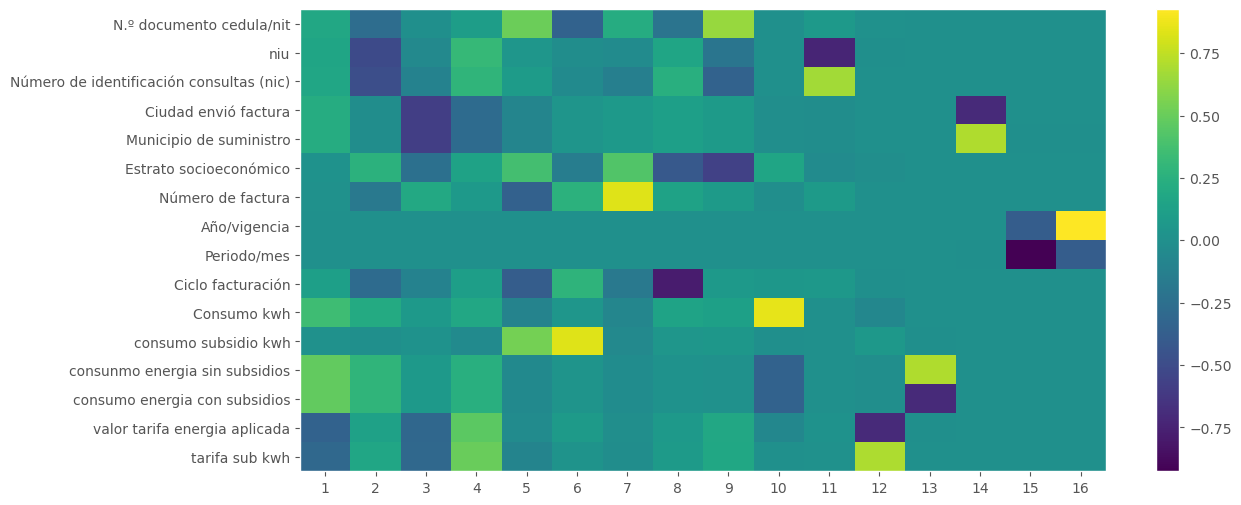

In [29]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 6))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df_cleaned.columns)), df_cleaned.columns)
plt.xticks(range(len(df_cleaned.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar()

Se representan las variables del dataset original y las observaciones transformadas en los ejes de los dos componentes principales. 
Las flechas representan las variables originales y es importante hacia dónde apuntan. 
La dirección y el sentido indican el peso y el signo de las variables originales en los dos componentes principales.

Algunas cosas que podemos comentar sobre las flechas son:

- Dos flechas que tienen dirección y sentido semejantes indica una correlación positiva.
- Dos flechas que tienen la misma dirección pero sentidos diferentes indican una correlación negativa.
- Un ángulo recto (90º) entre dos flechas indica no correlación entre ellas.
- Un ángulo llano (180º) entre dos flechas indica correlación negativa perfecta.

In [55]:
# Biplot de las componentes
# ==============================================================================
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

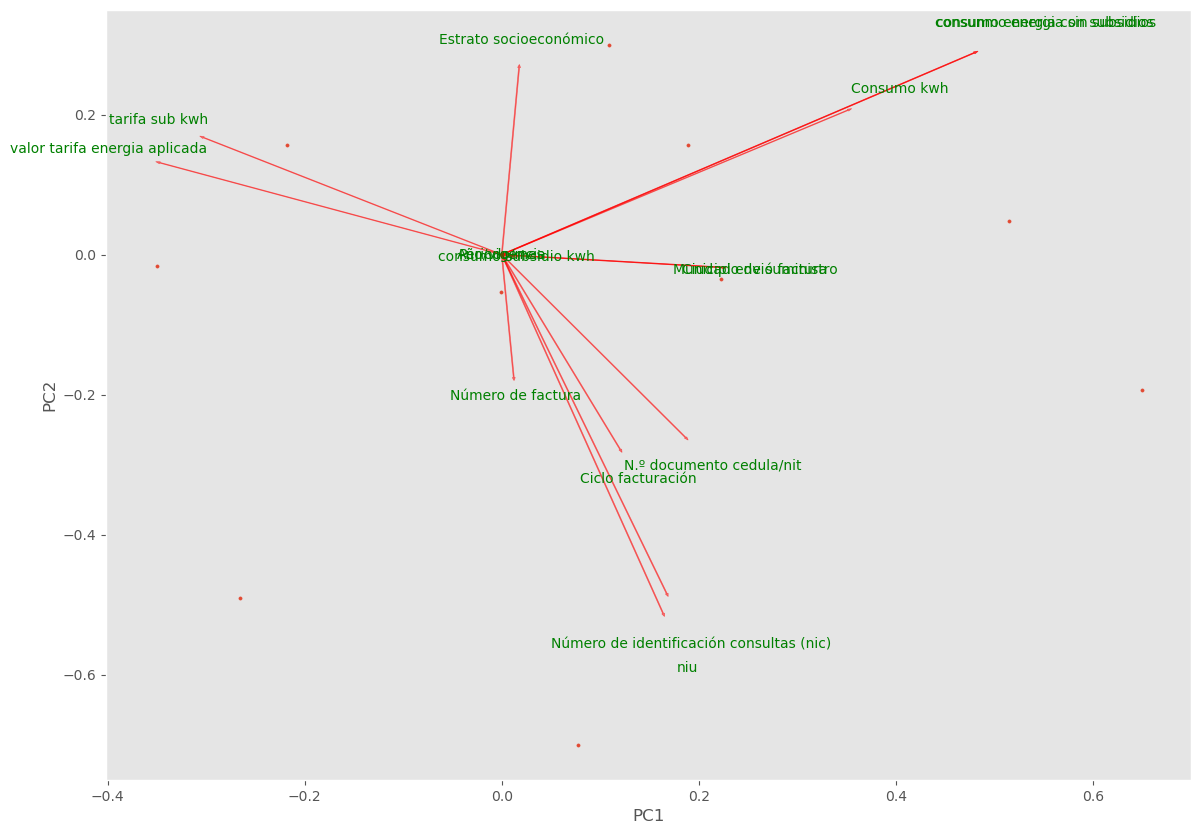

In [57]:
plt.figure(figsize=(14, 10))
biplot(componentes, np.transpose(modelo_pca.components_), list(df_cleaned.columns))


Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. 
Esta información está almacenada en los atributos explained_variance_ y explained_variance_ratio_ del modelo.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[1.90889202e-01 1.65871799e-01 1.49010234e-01 1.24119708e-01
 7.32627476e-02 7.10097586e-02 6.37607572e-02 5.50087591e-02
 4.66546679e-02 4.41632924e-02 1.18044706e-02 4.44460230e-03
 5.11882815e-10 8.91111154e-30 1.50338253e-33 3.37186928e-35]


Text(0, 0.5, 'Por. varianza explicada')

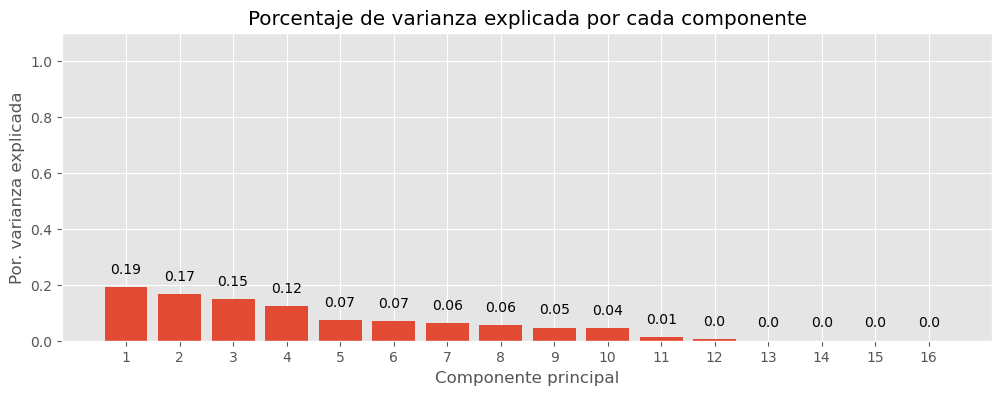

In [34]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_cleaned.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

En este caso, la primera componente explica el 19% de la varianza observada en los datos y la segunda el 17%, la tercera el 15% y así sucesivamente.
Las últimas 5 componentes no superan por separado el 1% de varianza explicada.

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.1908892  0.356761   0.50577124 0.62989094 0.70315369 0.77416345
 0.83792421 0.89293297 0.93958763 0.98375093 0.9955554  1.
 1.         1.         1.         1.        ]


Text(0, 0.5, 'Por. varianza acumulada')

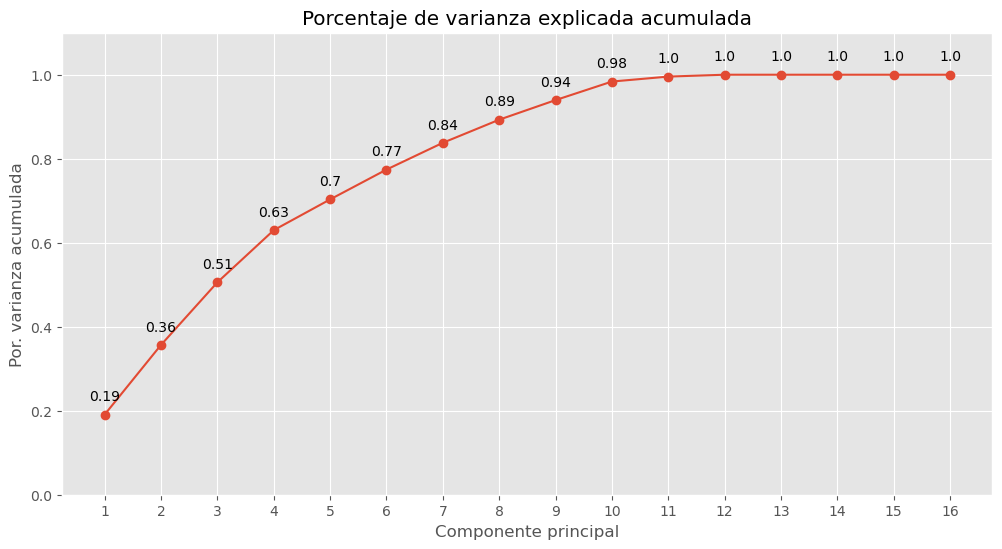

In [35]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(
    np.arange(len(df_cleaned.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_cleaned.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')

Si se únicamente usaramos la componente 9 y 10, se conseguiría explicar el 98% de la varianza observada.



# Transformación 
---
Una vez entrenado el modelo, con el método transform() se puede reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [49]:
# Proyección de las observaciones de entrenamiento
# ==============================================================================
proyecciones = pca_pipe.transform(X=df_cleaned)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16'],
    index   = df_cleaned.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0.436900,0.598980,0.535833,-1.090694,2.155658,-1.329718,1.721628,-0.753411,0.232968,0.338692,0.271606,-0.034228,-0.000004,-2.553513e-15,6.998525e-17,-2.493665e-18
1,0.810129,-1.920048,0.736642,-0.250459,-0.630756,0.408440,-0.026504,0.391806,-1.079671,0.033642,0.246545,-0.050019,-0.000007,-2.289835e-15,3.415237e-18,5.822166e-17
2,0.677629,-0.750756,1.065068,-1.083584,0.376197,-0.330805,1.022521,-1.012137,1.699408,0.033830,0.373185,-0.020935,-0.000001,-1.831868e-15,-1.018066e-16,6.201636e-17
3,-0.818937,0.719148,-0.073271,0.243798,1.367020,-1.036772,0.226333,0.618163,2.169156,-0.173100,0.344440,0.076541,0.000010,-2.164935e-15,4.109126e-17,-1.301043e-18
4,0.168468,0.080164,1.029458,-1.413562,-0.783117,0.444112,0.197535,-0.322005,-0.044680,0.020132,0.138138,-0.046619,-0.000005,-9.159340e-16,-8.223673e-17,7.274997e-17
